# Scan analysis

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [2]:
import pandas as pd

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from xgboost import XGBRegressor
import shap


from plots2.fns import (
    standard_layout,
    corner_annotations_colwise,
    corner_annotations_rowwise,
    get_text_annotation
)

from poly2.utils import get_dispersal_kernel, trait_vec, beta_dist, gamma_dist
from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture, get_asymptote_config
from poly2.simulator import SimulatorOneTrait, SimulatorAsymptote

C:\Users\user\anaconda3\envs\poly2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
df = pd.read_csv('../outputs/combined/scan_all.csv')

In [4]:
# df_filt = df.loc[lambda x: x.year==15]
df_filt = df.loc[lambda x: x.year<30]
# df_filt = df

In [27]:
X = (
    df_filt
    .drop([
        'run',
        # 'year', 
        'best_dose',
        'n_pos_diff'
    ], axis=1)
    .rename(columns = {
        'dec_rate_multiplier': 'dec_rate',
        'm_prop_multiplier': 'm_prop',
        'm_scale_multiplier': 'm_scale',
        'asymptote': 'asymp',
    })
)

y = np.array(df_filt.loc[:, 'best_dose'])

In [28]:
X.head()

,year,mu,b,asymp,dec_rate,m_prop,m_scale
0,1,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789
1,2,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789
2,3,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789
3,4,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789
4,5,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789


# Fit XGBoost model

To do this well should:
- split into test and train, runs 0-800 and then 800-1000
- choose some good hyperparams - learning rate and others

In [29]:
# train an XGBoost model
model = XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


# Plots

## visualise single run

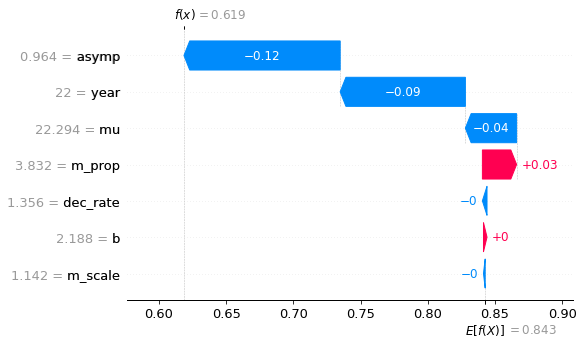

In [30]:
# visualize the first prediction's explanation
f = shap.plots.waterfall(shap_values[50], show=False)

f.patch.set_facecolor('white')

plt.show()

## single variable scatter plots

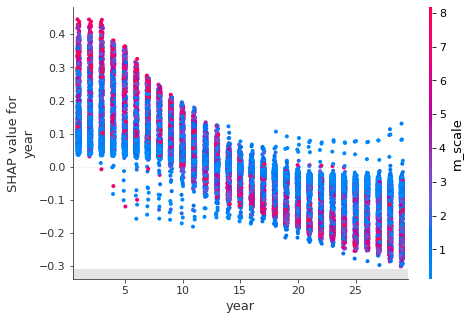

In [31]:
shap.plots.scatter(shap_values[:, "year"], color=shap_values)

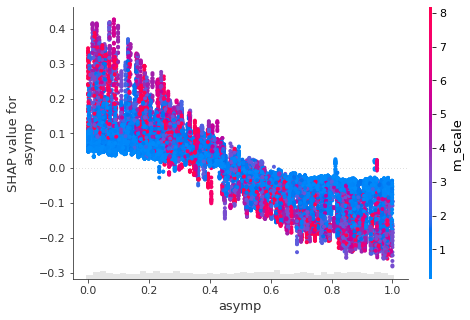

In [32]:
shap.plots.scatter(shap_values[:, "asymp"], color=shap_values)

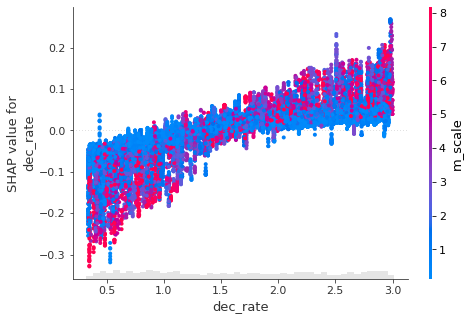

In [37]:
shap.plots.scatter(shap_values[:, "dec_rate"], color=shap_values)

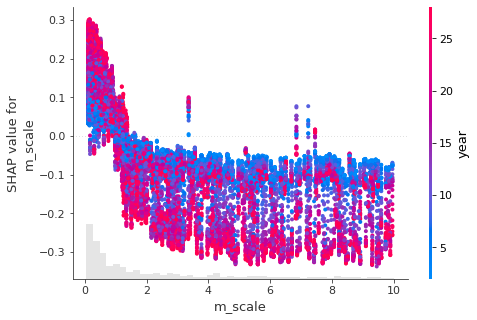

In [33]:
shap.plots.scatter(shap_values[:, "m_scale"], color=shap_values)

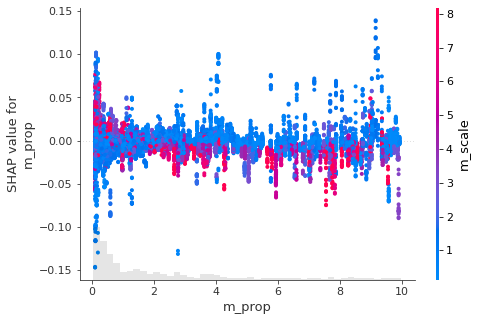

In [38]:
shap.plots.scatter(shap_values[:, "m_prop"], color=shap_values)

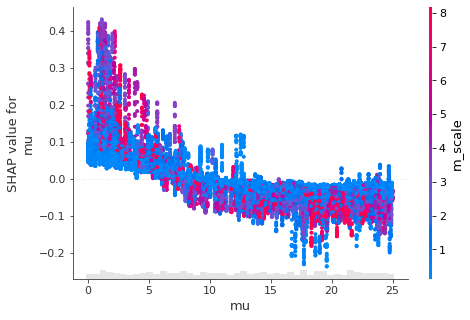

In [34]:
shap.plots.scatter(shap_values[:, "mu"], color=shap_values)

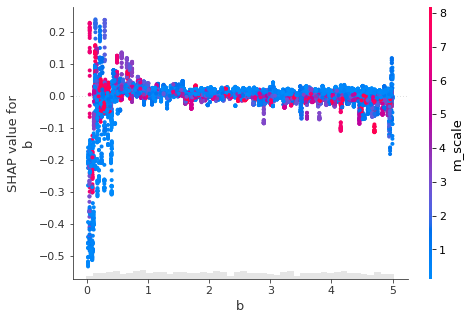

In [35]:
shap.plots.scatter(shap_values[:, "b"], color=shap_values)

## all variables

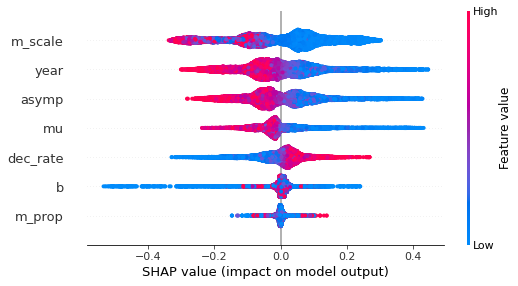

In [39]:
shap.plots.beeswarm(shap_values)